## Computer Vision(CS 436, CS5310, EE513) PA2: Camera Calibration

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [1]:
#Imports
import matplotlib
# import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (30 marks)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

In [2]:
# Cube size 54
X= np.array([0,18,36,54,0,18,36,54,0,18,36,54,0,18,36,54,54,54,54,54,54,54,54,54,54,54,54,54,36,36,36,18,18,18,0,0,0])
Y= np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,36,54,18,36,54,18,36,54,18,36,54,18,36,54,18,36,54,18,36,54])
Z= np.array([0,0,0,0,18,18,18,18,36,36,36,36,54,54,54,54,0,0,0,18,18,18,36,36,36,54,54,54,54,54,54,54,54,54,54,54,54])

In [3]:
points = np.loadtxt("points.txt", dtype=float)
print(points)

[[233.48624905 693.742497  ]
 [280.63238022 725.17325112]
 [343.49388846 762.89015606]
 [415.78462294 800.60706101]
 [217.77087199 627.73791335]
 [271.20315399 649.73944123]
 [340.35081305 687.45634617]
 [409.49847212 718.88710029]
 [205.19857034 542.87487722]
 [261.77392775 561.7333297 ]
 [334.06466223 596.30715923]
 [409.49847212 624.59483794]
 [205.19857034 454.86876569]
 [261.77392775 486.29951981]
 [337.20773764 511.4441231 ]
 [418.92769835 536.5887264 ]
 [484.932282   759.74708065]
 [544.65071483 715.74402488]
 [591.79684601 681.17019535]
 [488.07535742 684.31327076]
 [547.79379024 640.310215  ]
 [594.93992142 612.02253629]
 [488.07535742 590.0210084 ]
 [554.07994107 552.30410346]
 [598.08299684 536.5887264 ]
 [491.21843283 508.30104769]
 [560.36609189 476.87029357]
 [607.51222307 454.86876569]
 [412.64154753 470.58414275]
 [478.64613118 445.43953945]
 [532.07841318 426.58108698]
 [340.35081305 448.58261486]
 [409.49847212 426.58108698]
 [450.35845247 401.43648368]
 [277.48930481

In [4]:
def findCameraMatrix(points, X, Y, Z):
    x = points[:,0]
    y = points[:,1]
    SHAPE = ((points.shape[0] * 2), 12)
    mat= np.zeros(SHAPE)
    k= 0
    for i in range(0,SHAPE[0],2):
        mat[i,:] = [X[k], Y[k], Z[k], 1, 0, 0, 0, 0, -(x[k] * X[k]), -(x[k] *Y[k]), (-x[k] * Z[k]), -x[k]]
        mat[i+1,:] = [0, 0, 0, 0, X[k], Y[k], Z[k], 1, -(y[k] * X[k]), -(y[k] * Y[k]), -(y[k] * Z[k]), -y[k] ]
        k = k + 1
    return mat

In [5]:
cameraMatrix = findCameraMatrix(points, X, Y, Z)
print(cameraMatrix.shape)

(74, 12)


In [6]:
_, _, V= np.linalg.svd(cameraMatrix)
P= (V.T)[:,-1]
P= np.reshape(P,(-1,4))
print(P)

[[ 3.31921637e-03  6.20486085e-03 -1.23340874e-03  3.09860451e-01]
 [-1.38176470e-04  1.31016130e-04 -7.36441934e-03  9.50725674e-01]
 [-3.69074234e-06  4.10795619e-06 -2.87330846e-06  1.37248017e-03]]


In [7]:
def printing(frame, points, P, X, Y, Z):
    x = points[:,0]
    y = points[:,1]
    ones= np.ones((X.shape[0]))
    XYH= np.matmul(P,np.stack((X,Y,Z,ones)))
    Xh_norm = XYH[0,:]/XYH[2,:]
    Xy_norm = XYH[1,:]/XYH[2,:]
    im = plt.imread(frame)
    implot = plt.imshow(im)
    plt.plot(Xh_norm, Xy_norm, 'bo' )
    plt.scatter(x,y)
    plt.show()

<IPython.core.display.Javascript object>


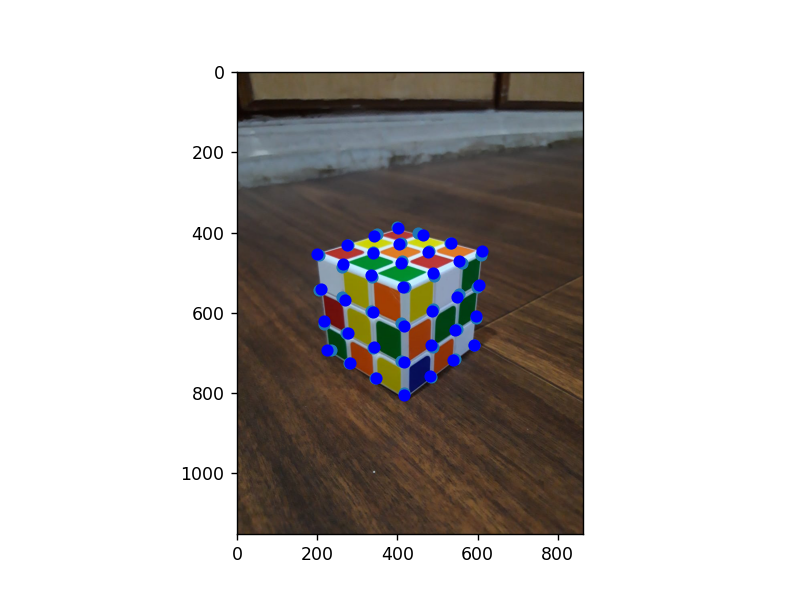

In [8]:
printing('rubiks_cube.jpeg', points, P, X, Y, Z)

In [9]:
def projectionError(points, P, X, Y, Z):
    ones= np.ones((X.shape[0]))
    XYH= np.matmul(P,np.stack((X,Y,Z,ones)))
    Xh_norm = XYH[0,:]/XYH[2,:]
    Xy_norm = XYH[1,:]/XYH[2,:]
    x = points[:,0]
    y = points[:,1]
    calCoordinates= np.stack((Xh_norm,Xy_norm), axis=-1)
    orgCoordinates= np.stack((x,y), axis=-1)
    projError= np.sqrt(np.sum(np.power(calCoordinates-orgCoordinates,2)))/(points.shape[0])
    print('re-projection error: ', projError)

In [10]:
projectionError(points, P, X, Y, Z)

re-projection error:  1.0986089207851395


## Part 2 (30 marks)
### Since we are using direct linear transformation, the QR decomposition of a matrix is

In [11]:

from numpy.linalg import qr
from scipy.linalg import rq

def myRQ(matrix):
  Q, L = qr(np.linalg.inv(matrix))
  K, R = np.linalg.inv(L), Q.T
  return K, R


### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points and the camera center (You also have to plot the points for 3d calibration object as well)

In [12]:
K, R = myRQ(P[:,:-1])

print("K:\n", K)
print("R:\n", R)

K:
 [[-6.61587106e-03 -2.79720704e-05 -2.69597112e-03]
 [ 0.00000000e+00  6.44544269e-03 -3.56751997e-03]
 [-0.00000000e+00 -0.00000000e+00 -6.22517346e-06]]
R:
 [[-0.74459833 -0.66750951  0.00209541]
 [ 0.30671481 -0.3449212  -0.88710506]
 [ 0.59287382 -0.65989425  0.46156279]]


In [13]:
_, _, V= np.linalg.svd(P)
cameraCenter= (V.T)[:,-1]
cameraCenter= cameraCenter/cameraCenter[-1]
print('Camera Center:',cameraCenter)

Camera Center: [ 154.84204195 -108.06685246  124.26935575    1.        ]


In [15]:
def projection(cameraCenter, X, Y, Z):
    ax = plt.figure().gca(projection='3d')  
    ax.scatter(X,Y,Z, marker='o')
    ax.scatter(cameraCenter[0], cameraCenter[1], cameraCenter[2], 'o')
    plt.show()

<IPython.core.display.Javascript object>


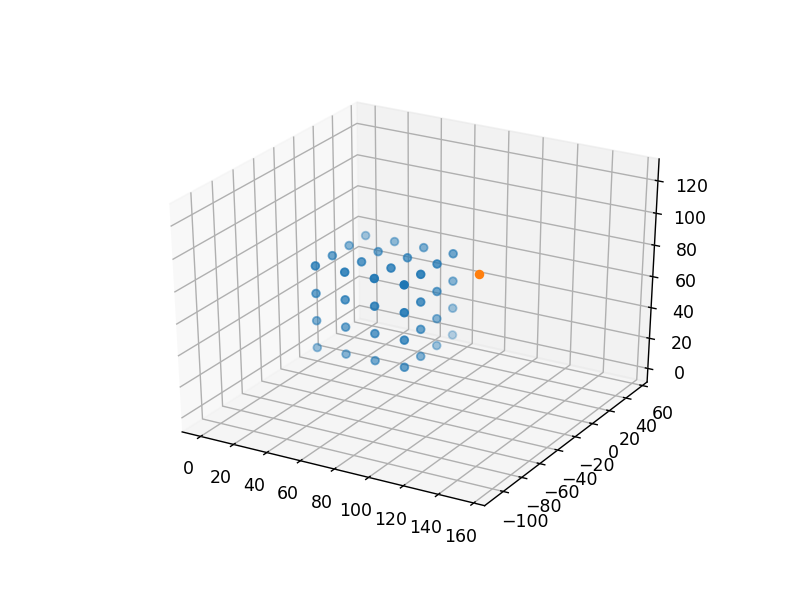

In [16]:
projection(cameraCenter, X, Y, Z)

## (Grad Only) Part 3 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

In [ ]:
#Refer to Lecture 19: slide 29

#TODO